# -----------------:The Sparks Foundation Internship Programme:-----------

# Task3 - Prediction using Decision Tree Leaninig (Sparks Foundation internship programme)


   ##         --------------------------------- Program written and  Submitted By -  Vinayak M Boormane 

## Decision Tree Algorithm:

 
Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

A decision tree is made up of three types of nodes:

###            Decision Nodes: node have two or more branches
            Leaf Nodes: the lowest nodes which represents decision
            Root Node: Topmost level decision nodes
            Here is a step by step guide to build a decision tree.
            
### Import and Check The Dataset
Firstly, we will import several dependencies such as pandas, numpy, seaborn, and also several modules in scikit-learn. We also going to read the Iris CSV file into our python code.
One important thing to note is that I use the newest scikit-learn to date (0.18.1), on the old scikit-learn the train_test_split is belong to cross_validation module. So, make sure either update your scikit-learn or change model_selection to cross_validation.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


* After importing the data, let’s check whether we have null values in our dataset or not.

In [6]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [7]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

* Okay, so as expected all of the width and length column represented using float64 and the name of the species using object or string. Now, let’s check a quick summary of data.

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


It seems most of them are pretty normal. Unless I notice that the PetalWidthCm have a weird value. It has a minimum value of 0.1 while the maximum one is actually 2.5. Let’s try to plot the PetalWithCm.

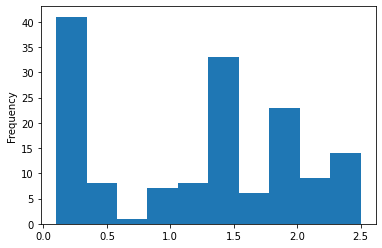

In [9]:
df['PetalWidthCm'].plot.hist()
plt.show()

### Check The Relationship Between Columns
To check the relationships we are going to use seaborn.seaborn provides us with a function called pairplot that plot pairwise relationships in a dataset. We can throw the whole dataframe as the parameters so that it will check relationship for each column to other columns. We can also give categorical color based on a certain column. To know whether there are outliers in our data or not we can give hue with Species as the parameter.

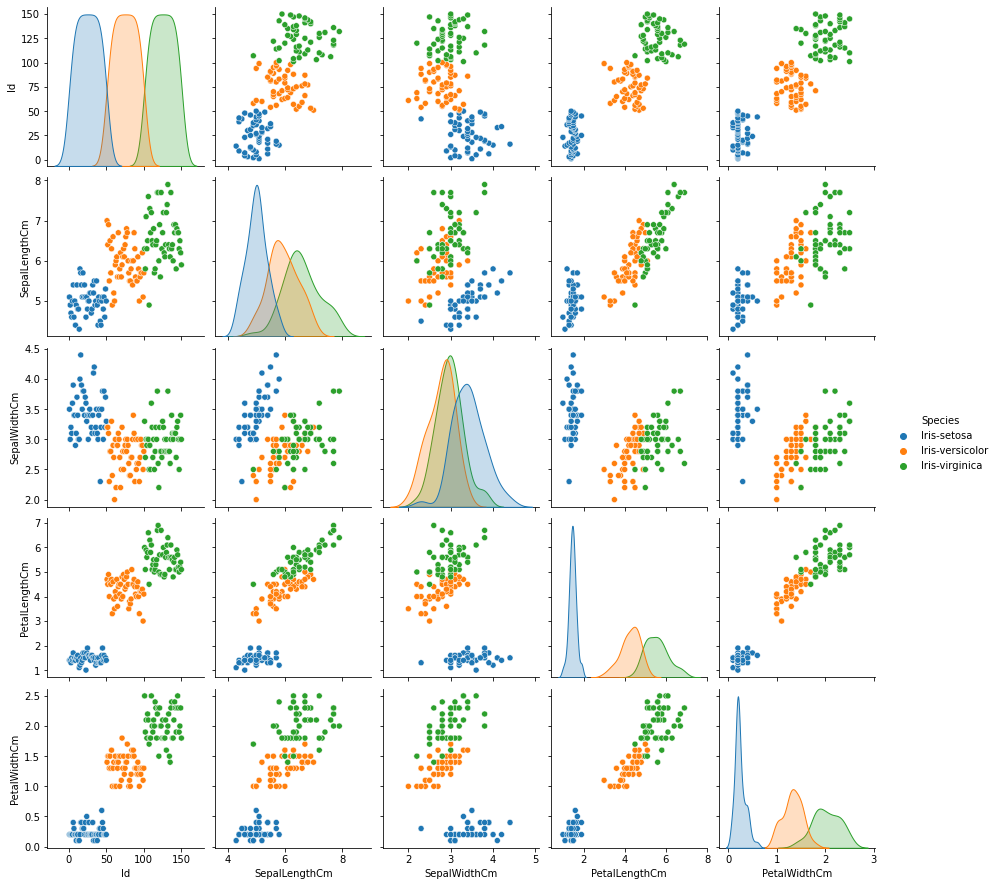

In [11]:

sns.pairplot(df, hue='Species')

If you see, most of them already separated based on those properties. However, there are some outliers. Those outliers might be from wrong data or maybe it is really a data anomaly. Let’s assume that it is just a data anomaly to avoid too much assumption.

### Splitting The Dataset
Since there is only one dataset available (no separated training and test dataset) we need to divide the dataset into training and test dataset by ourself. To do this, we can use the train_test_split method from the scikit-learn. Don’t forget to split the input and output column to different arrays.

In [12]:
all_inputs = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
all_classes = df['Species'].values

(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.7, random_state=1)


I configured it to split the dataset into 70:30 for training and test dataset. I also define a random_state equal to 1. The usage of defining random_state is to make sure the splitted dataset is the same even if we split the dataset again and again. It is actually only used to make sure we can reproduce the exact same dataset again.

In [30]:
dtc = DecisionTreeClassifier()
dtc.fit(train_inputs, train_classes)

print("test input prediction score is ", + dtc.score(test_inputs, test_classes))

test input prediction score is  0.9555555555555556


In [23]:
from IPython.display import Image
from sklearn import tree 
text_representation = tree.export_text(dtc)
print(text_representation)
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

|--- feature_2 <= 2.60
|   |--- class: Iris-setosa
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



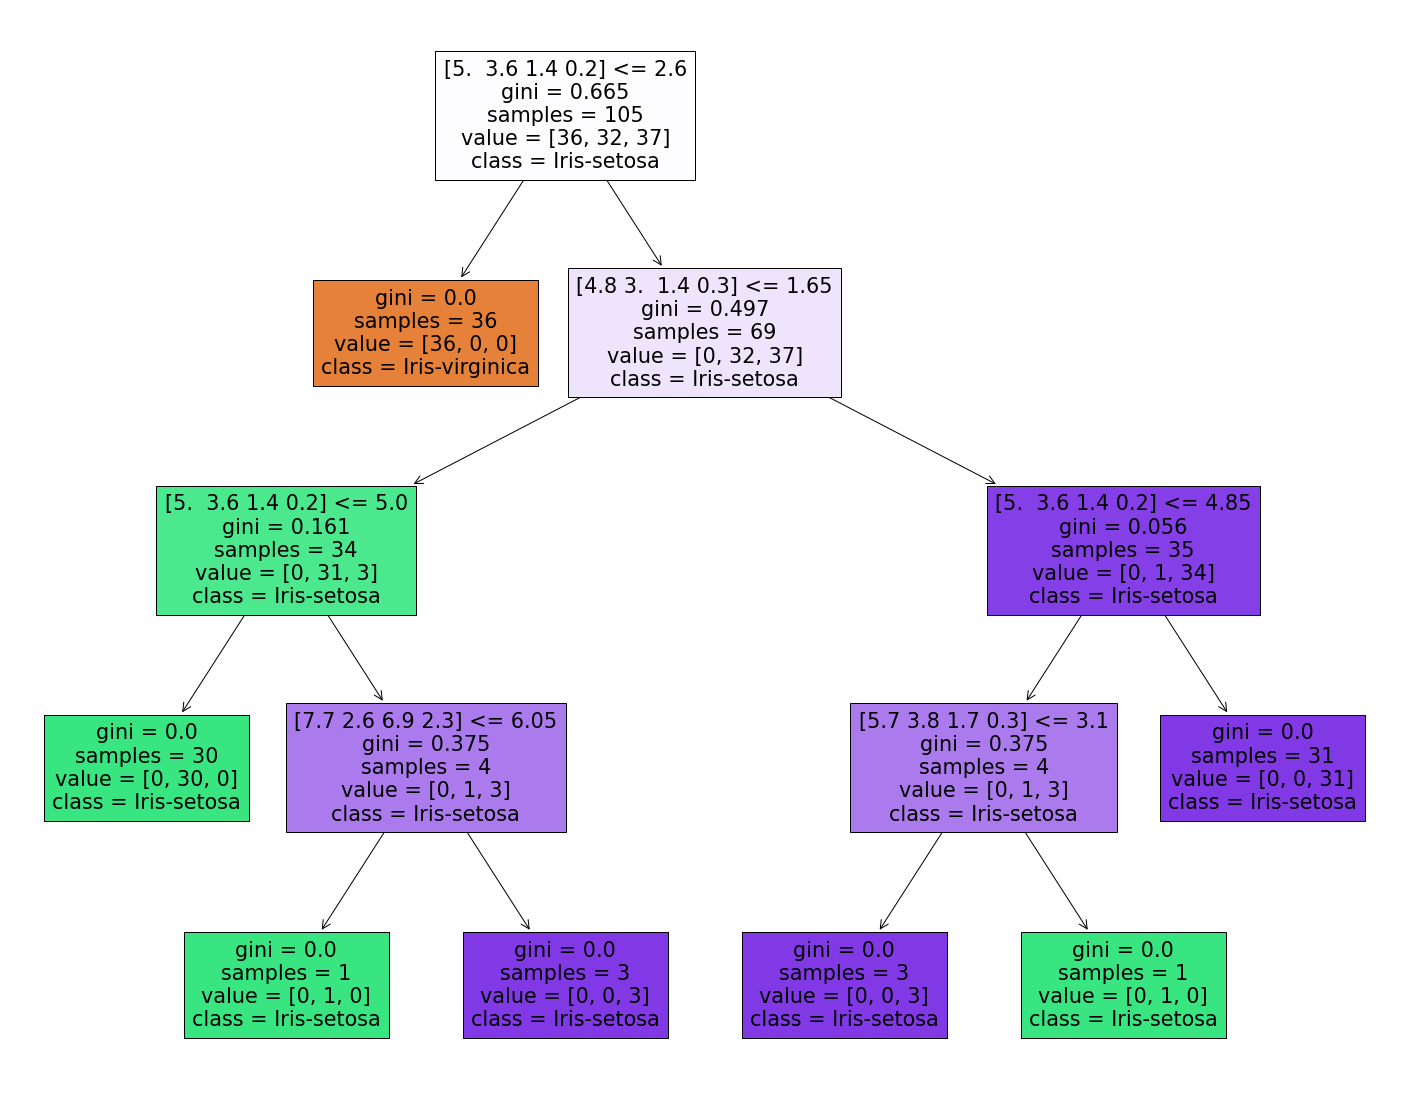

In [27]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, 
                   feature_names=train_inputs,  
                   class_names=train_classes,
                   filled=True)